In [ ]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.4 MB/s eta 0:00:00


In [ ]:
import os
wdir = os.getcwd()
print(wdir)

/content


In [ ]:
import csv
from Bio import SeqIO
from Bio import Entrez

fasta_file = {}
count = 0

Entrez.email = "daverussell1309@gmail.com"
with open('accessions.txt') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=",")
  for row in csv_reader:
    print(row)
    with Entrez.efetch(db="nucleotide", rettype="gb", retmode="text", id = row[0]) as handle:
      for seq_record in SeqIO.parse(handle, "gb"):
        fasta_file[row[1]] = str(seq_record.seq)
        count += 1

print("Number of retreived sequences :", count)
f = open("sequences.txt", "w+")
for keys,values in fasta_file.items():
  f.write(">" + str(keys) + "\n" + str(values) + "\n")
  filename = keys + ".fasta"
  with open(filename, "w") as individual_file:
      individual_file.write(">" + str(keys) + "\n" + str(values) + "\n")
      print("Sequence saved to:", filename)
f.close()

['AB750369', 'HIV1']
['NC_001722', 'HIV2']
['AF115393', 'SIVcpz']
['KP004991', 'SIVgor']
['M83293', 'SIVmac']
['AF334679', 'SIVsm']
['AB253736', 'SIVagm']
['FR751162', 'SIVsun']
Number of retreived sequences : 8
Sequence saved to: HIV1.fasta
Sequence saved to: HIV2.fasta
Sequence saved to: SIVcpz.fasta
Sequence saved to: SIVgor.fasta
Sequence saved to: SIVmac.fasta
Sequence saved to: SIVsm.fasta
Sequence saved to: SIVagm.fasta
Sequence saved to: SIVsun.fasta


In [ ]:
from Bio import AlignIO
alignment = AlignIO.read("aln_muscle.fasta","fasta")
print(alignment)

FileNotFoundError: ignored

In [ ]:
from Bio.Phylo.TreeConstruction import DistanceCalculator
calculator = DistanceCalculator('identity')
distance_matrix = calculator.get_distance(alignment)
print(distance_matrix)

SIVsun  0.000000
SIVgor  0.491152    0.000000
HIV1    0.527049    0.329867    0.000000
SIVcpz  0.471693    0.278370    0.292544    0.000000
SIVagm  0.473119    0.423887    0.455926    0.428164    0.000000
SIVsm   0.488216    0.439738    0.476977    0.451313    0.396041    0.000000
SIVmac  0.498616    0.454500    0.469513    0.461293    0.409461    0.222427    0.000000
HIV2    0.535100    0.501468    0.475216    0.500965    0.452403    0.294305    0.232072    0.000000
    SIVsun  SIVgor  HIV1    SIVcpz  SIVagm  SIVsm   SIVmac  HIV2


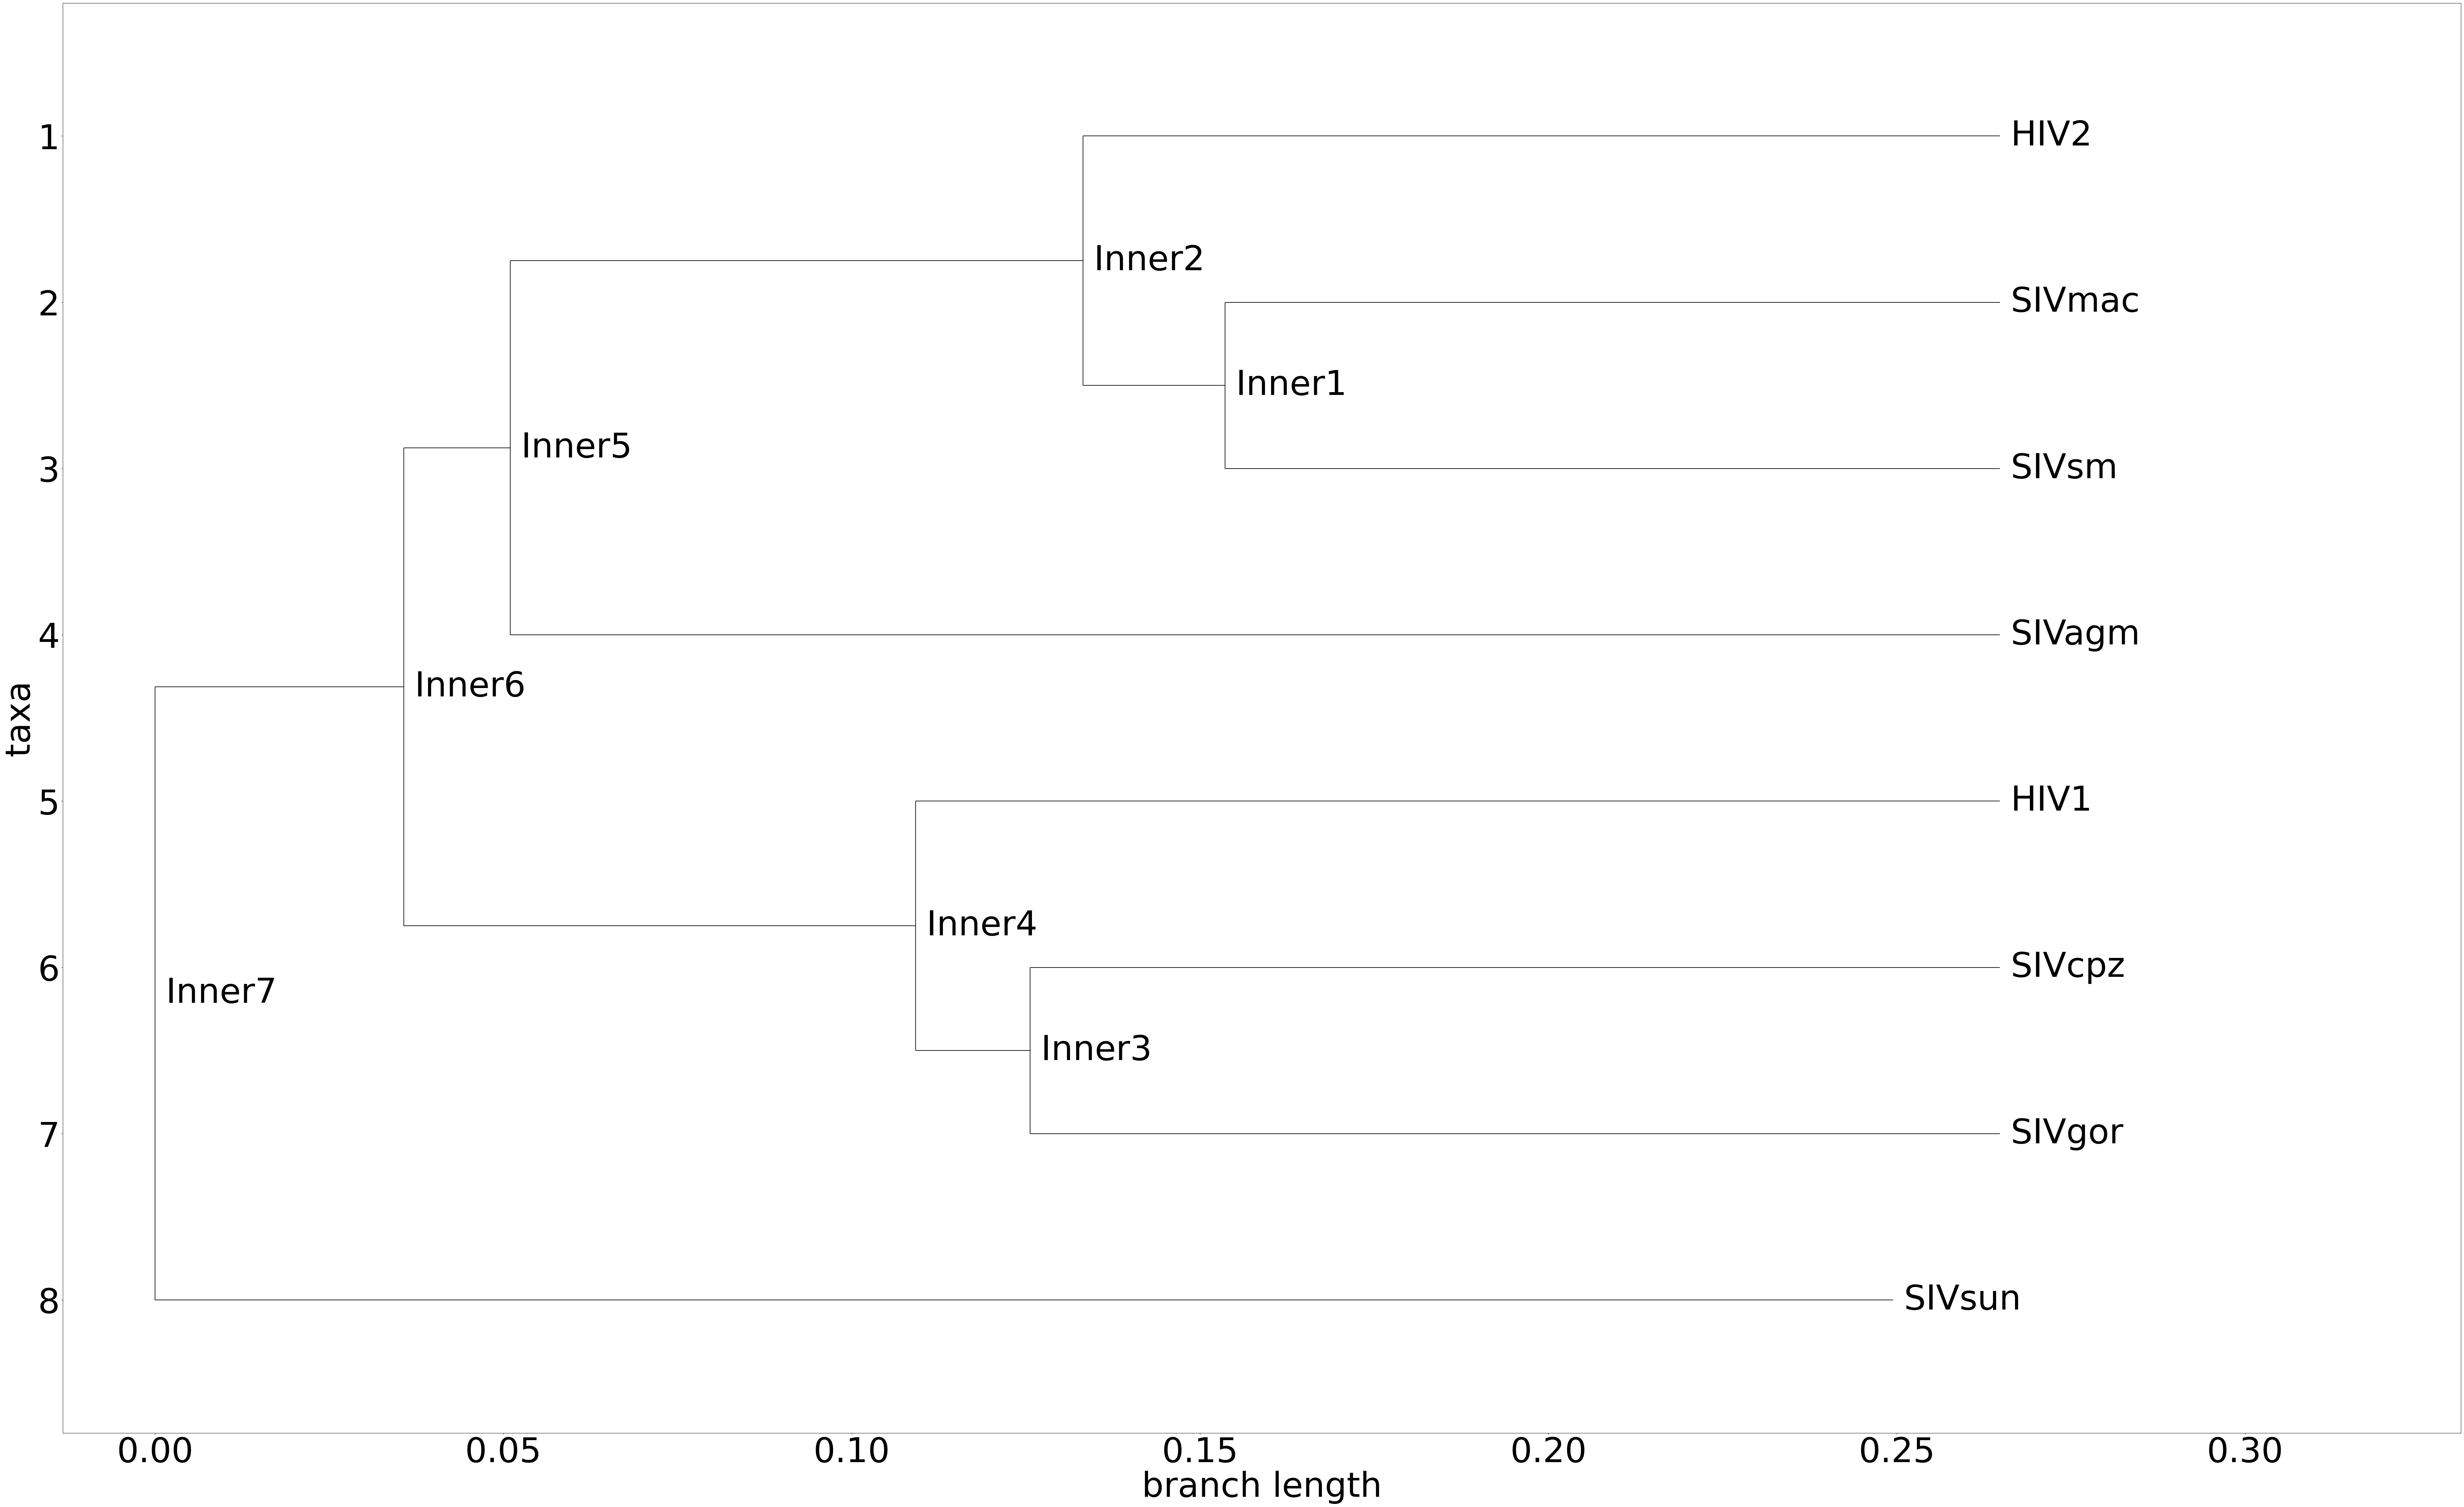

In [ ]:
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

constructor = DistanceTreeConstructor()
tree = constructor.upgma(distance_matrix)

import matplotlib
import matplotlib.pyplot as plt

def plot_tree(tree, out_file):
  fig = plt.figure(figsize=(100, 60), dpi=100)
  plt.rcParams.update({'font.size':80})
  axes = fig.add_subplot(1, 1, 1)
  fig1 = plt.gcf()
  Phylo.draw(tree, axes=axes, branch_labels=None)
  fig1.savefig(out_file, dpi=100)
  return

plot_tree(tree, "HIV_Phylogenetic_Tree.jpg")

# Individual Sequence

In [ ]:
hiv_1_seq = SeqIO.read("HIV1.fasta", "fasta").seq
hiv_2_seq = SeqIO.read("HIV2.fasta", "fasta").seq
siv_mac_seq = SeqIO.read("SIVmac.fasta", "fasta").seq
siv_cpz_seq = SeqIO.read("SIVcpz.fasta", "fasta").seq
siv_gor_seq = SeqIO.read("SIVgor.fasta", "fasta").seq
siv_sm_seq = SeqIO.read("SIVsm.fasta","fasta").seq

# Sequence alignment

In [ ]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

def aln_similiarity(aln_score, seq):
  return aln_score / len(seq) * 100

hiv1_cpz_aln = pairwise2.align.globalxx(hiv_1_seq, siv_cpz_seq, one_alignment_only=True, score_only=True)
hiv1_gor_aln = pairwise2.align.globalxx(hiv_1_seq, siv_gor_seq, one_alignment_only=True, score_only=True)
hiv2_mac_aln = pairwise2.align.globalxx(hiv_2_seq, siv_mac_seq, one_alignment_only=True, score_only=True)
hiv2_sm_aln = pairwise2.align.globalxx(hiv_2_seq, siv_sm_seq, one_alignment_only=True, score_only=True)

hiv1_mac_aln = pairwise2.align.globalxx(hiv_1_seq, siv_mac_seq, one_alignment_only=True, score_only=True)
hiv2_cpz_aln = pairwise2.align.globalxx(hiv_2_seq, siv_cpz_seq, one_alignment_only=True, score_only=True)

hiv1_hiv2_aln = pairwise2.align.globalxx(hiv_1_seq, hiv_2_seq, one_alignment_only=True, score_only=True)
hiv2_hiv1_aln = pairwise2.align.globalxx(hiv_2_seq, siv_cpz_seq, one_alignment_only=True, score_only=True)

print("HIV-1 - SIVcpz similiarity :", hiv1_cpz_aln)
print("HIV-1 - SIVgor similiarity :", hiv1_gor_aln)
print("HIV-2 - SIVmac similiarity :", hiv2_mac_aln)
print("HIV-2 - SIVsm similiarity :", hiv2_sm_aln)

print("")

print("HIV-1 - SIVcpz similiarity :", aln_similiarity(hiv1_cpz_aln, hiv_1_seq),"%")
print("HIV-1 - SIVgor similiarity :", aln_similiarity(hiv1_gor_aln, hiv_1_seq),"%")
print("HIV-2 - SIVmac similiarity :", aln_similiarity(hiv2_mac_aln, hiv_2_seq),"%")
print("HIV-2 - SIVsm similiarity :", aln_similiarity(hiv2_sm_aln, hiv_2_seq),"%")

print("")

print("HIV-1 - SIVmac similiarity :", aln_similiarity(hiv1_mac_aln, hiv_1_seq),"%")
print("HIV-2 - SIVcpz similiarity :", aln_similiarity(hiv2_cpz_aln, hiv_2_seq),"%")

HIV-1 - SIVcpz similiarity : 7247.0
HIV-1 - SIVgor similiarity : 7060.0
HIV-2 - SIVmac similiarity : 8124.0
HIV-2 - SIVsm similiarity : 7661.0

HIV-1 - SIVcpz similiarity : 74.92762613730356 %
HIV-1 - SIVgor similiarity : 72.99421009098428 %
HIV-2 - SIVmac similiarity : 78.42455835505358 %
HIV-2 - SIVsm similiarity : 73.95501496283426 %

HIV-1 - SIVmac similiarity : 71.2262200165426 %
HIV-2 - SIVcpz similiarity : 64.61048363741673 %


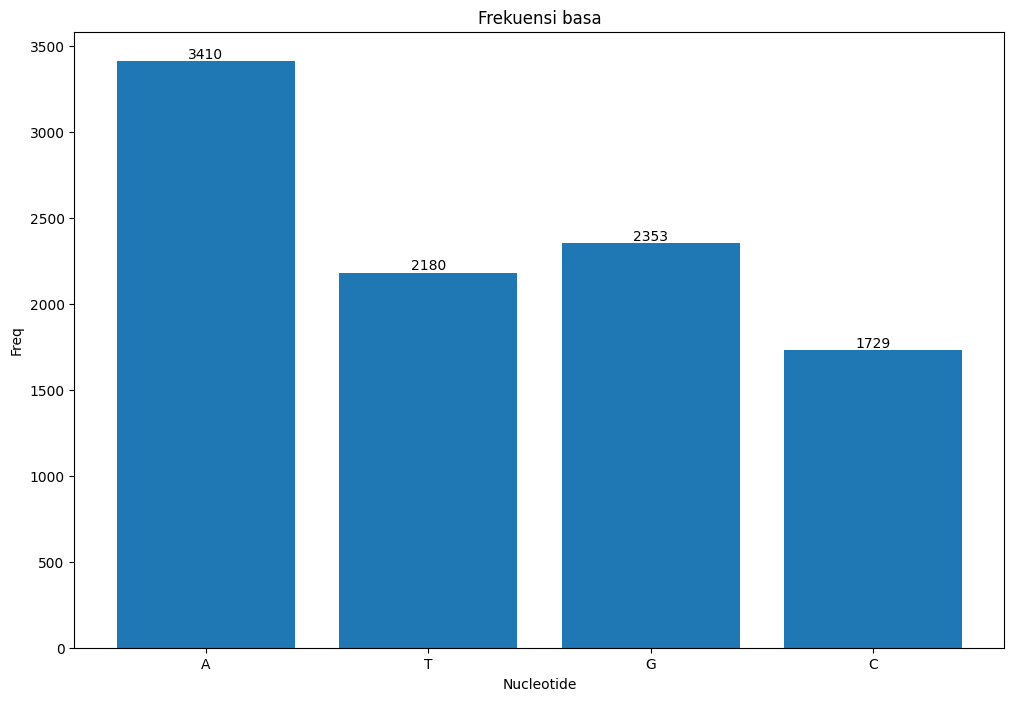

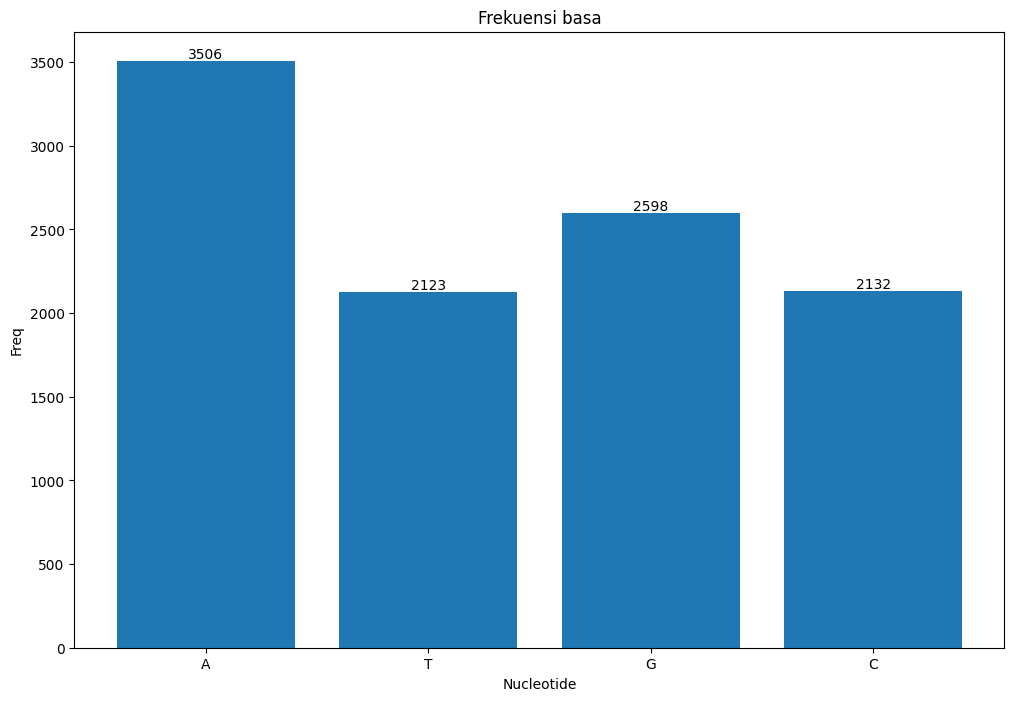

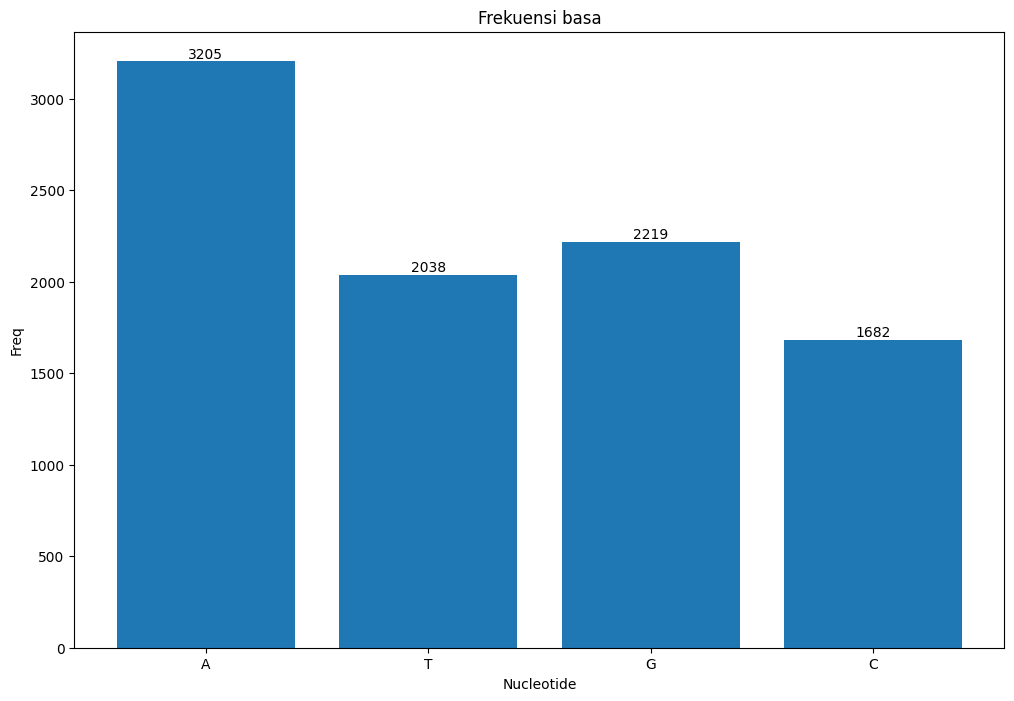

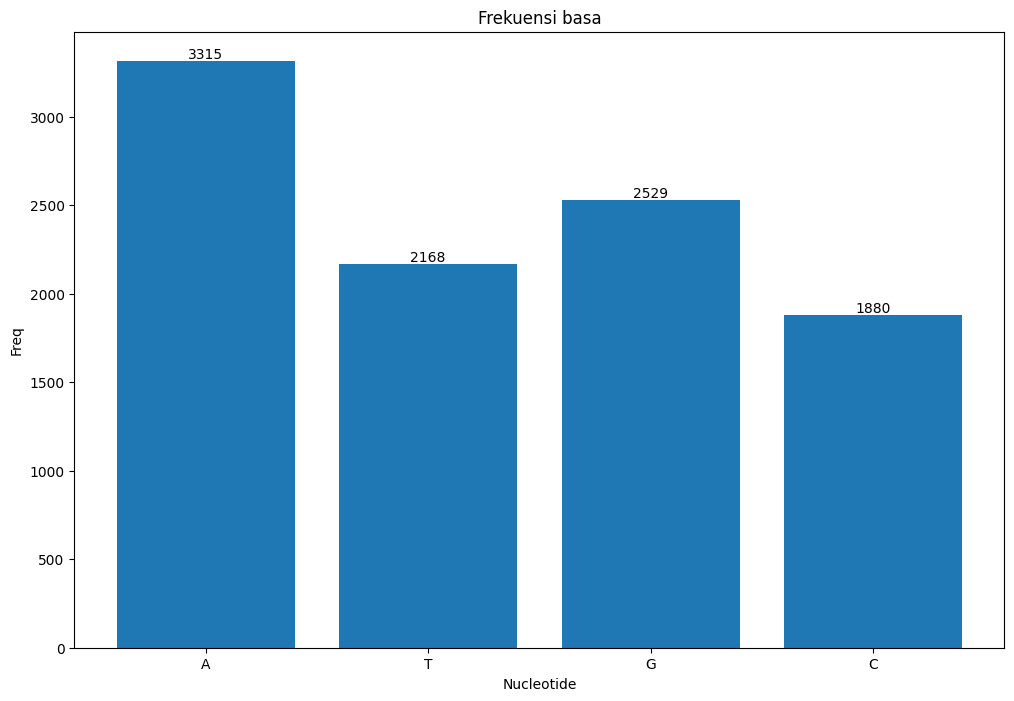

In [ ]:
def atgc_freq(seq):
  urutan_basa = ['A', 'T', 'G', 'C']
  jumlah_basa = [seq.count(x) for x in urutan_basa]

  # Import matplotlib
  import matplotlib.pyplot as plt

  # Config plot
  plt.figure(figsize=(12,8))
  plt.title('Frekuensi basa')
  plt.bar(urutan_basa, jumlah_basa)
  for i in range(len(urutan_basa)):
    plt.text(urutan_basa[i], jumlah_basa[i], str(jumlah_basa[i]), ha='center', va='bottom')
  plt.xlabel('Nucleotide')
  plt.ylabel('Freq')
  plt.show()

atgc_freq(hiv_1_seq)
atgc_freq(hiv_2_seq)
atgc_freq(siv_cpz_seq)
atgc_freq(siv_mac_seq)

In [ ]:
# GC_Content
def gc_content(seq):
  result = float((seq.count('G')+seq.count('C'))/len(seq))*100
  return result

# AT_Content
def at_content(seq):
  result = float((seq.count('A')+seq.count('T'))/len(seq))*100
  return result

print("GC HIV-1:",gc_content(hiv_1_seq))
print("GC HIV-2:",gc_content(hiv_2_seq))
print("GC SIVcpz:",gc_content(siv_mac_seq))
print("GC SIVmac:",gc_content(siv_cpz_seq))

print("")

print("AT HIV-1:",at_content(hiv_1_seq))
print("AT HIV-2:",at_content(hiv_2_seq))
print("AT SIVcpz:",at_content(siv_mac_seq))
print("AT SIVmac:",at_content(siv_cpz_seq))

GC HIV-1: 42.204301075268816
GC HIV-2: 45.66077806738102
GC SIVcpz: 44.57137080469066
GC SIVmac: 42.54089422028353

AT HIV-1: 57.795698924731184
AT HIV-2: 54.339221932618976
AT SIVcpz: 55.42862919530934
AT SIVmac: 57.17557251908397


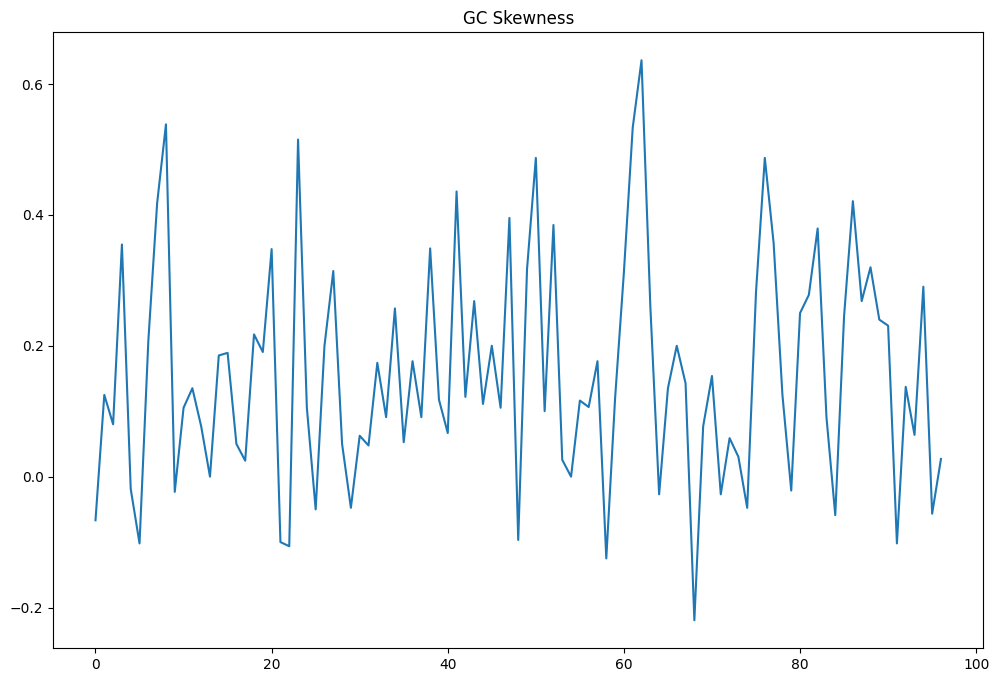

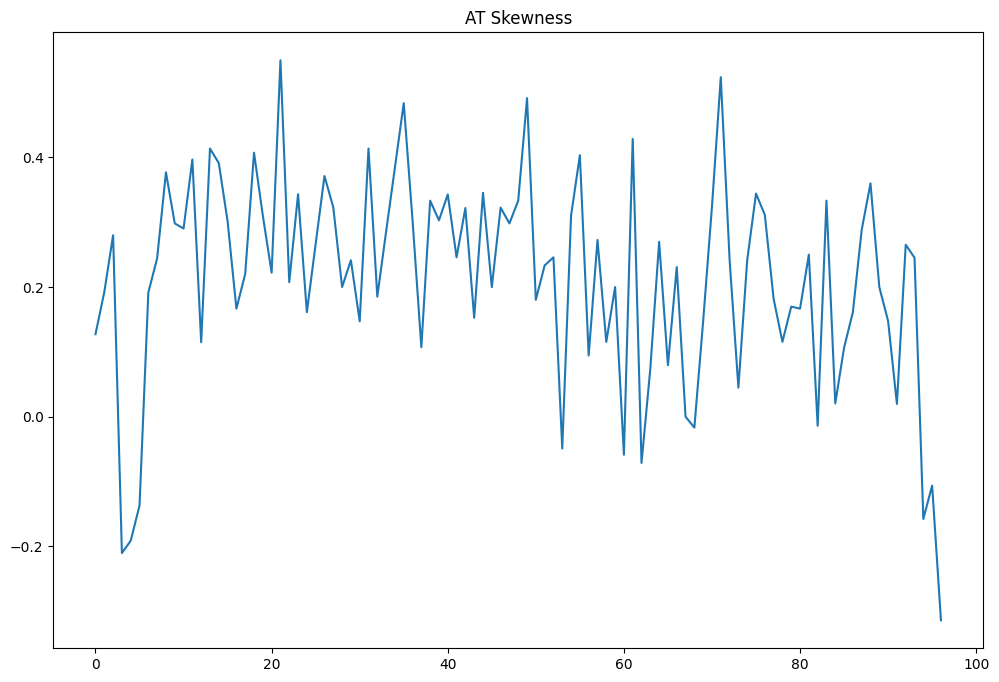

In [ ]:
def skewness(seq, nuc_1, nuc_2, window=100):
  temp = []
  for i in range(0,len(seq),window):
    subseq = seq[i:i+window]
    nuc1_count = subseq.count(nuc_1)
    nuc2_count = subseq.count(nuc_2)
    if nuc1_count + nuc2_count != 0:
      skew = (nuc1_count-nuc2_count)/(nuc1_count+nuc2_count)
      temp.append(skew)
    else:
      temp.append(0)
  return temp

import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.title('GC Skewness')
plt.plot(skewness(hiv_1_seq, "G", "C"))
plt.show()

plt.figure(figsize=(12,8))
plt.title('AT Skewness')
plt.plot(skewness(hiv_1_seq, "A", "T"))
plt.show()

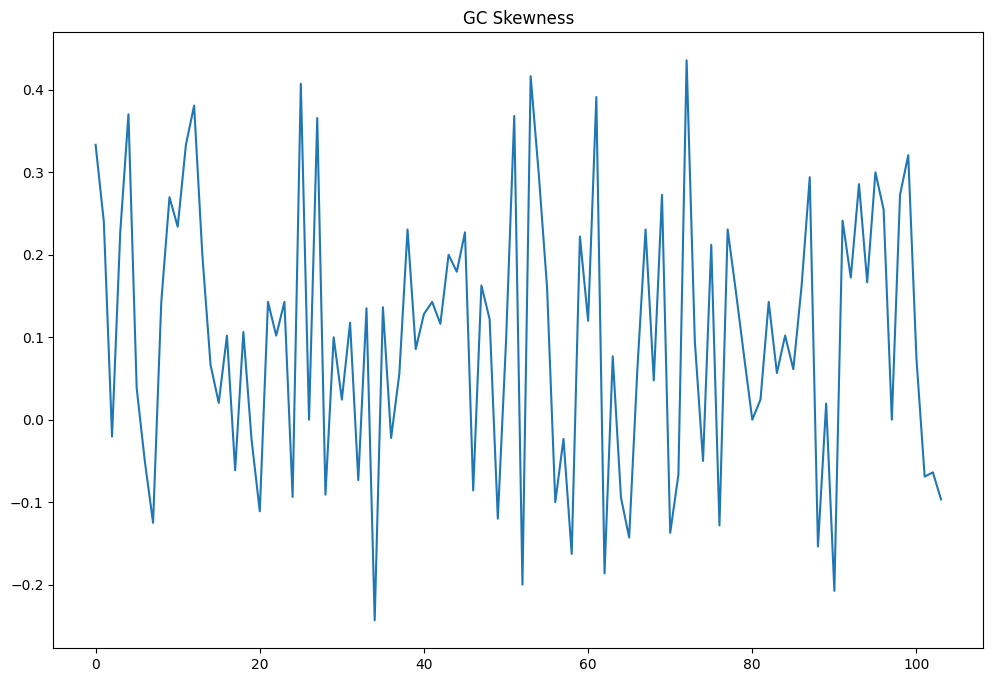

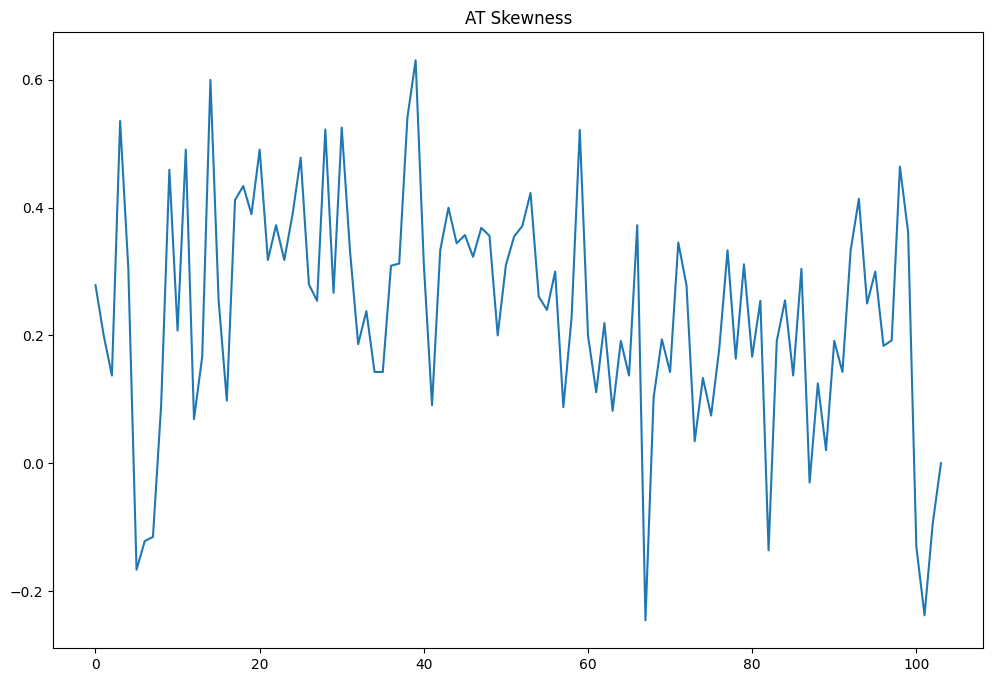

In [ ]:
plt.figure(figsize=(12,8))
plt.title('GC Skewness')
plt.plot(skewness(hiv_2_seq, "G", "C"))
plt.show()

plt.figure(figsize=(12,8))
plt.title('AT Skewness')
plt.plot(skewness(hiv_2_seq, "A", "T"))
plt.show()

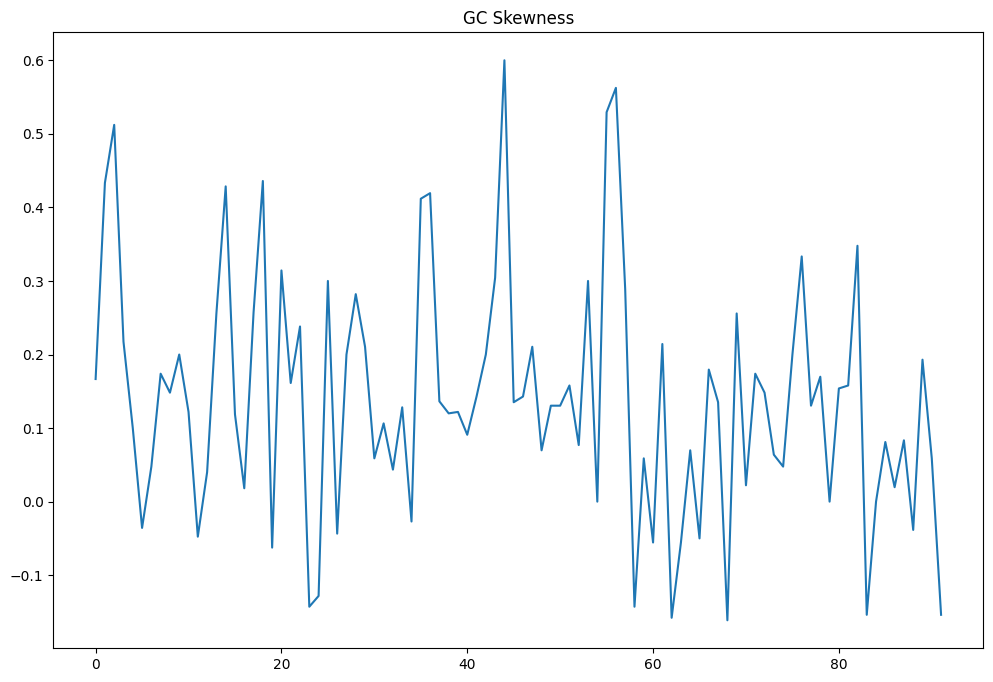

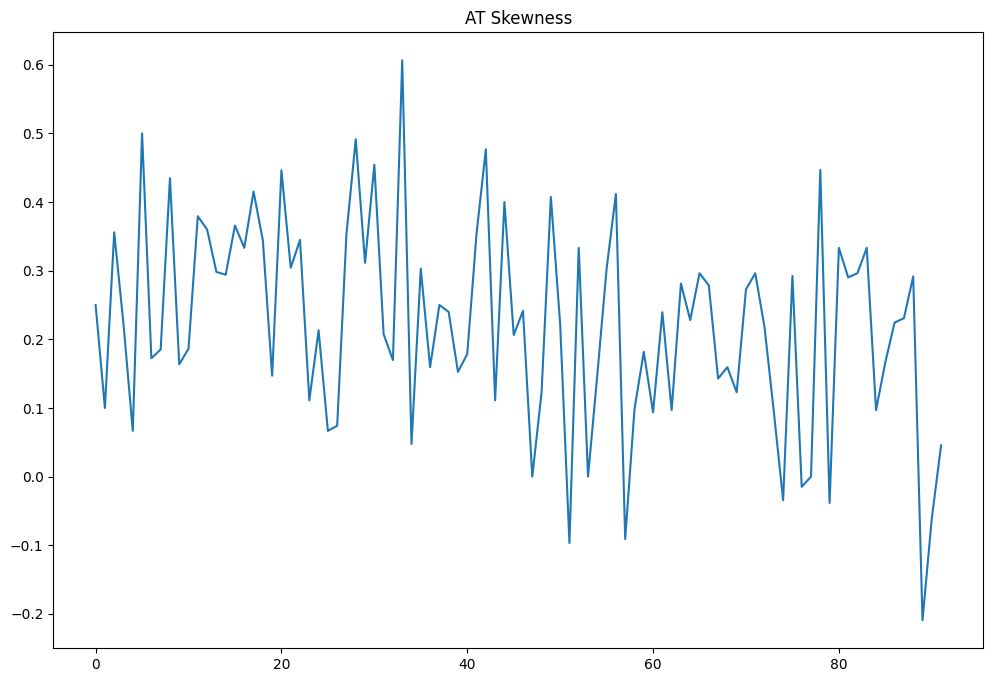

In [ ]:
plt.figure(figsize=(12,8))
plt.title('GC Skewness')
plt.plot(skewness(siv_cpz_seq, "G", "C"))
plt.show()

plt.figure(figsize=(12,8))
plt.title('AT Skewness')
plt.plot(skewness(siv_cpz_seq, "A", "T"))
plt.show()

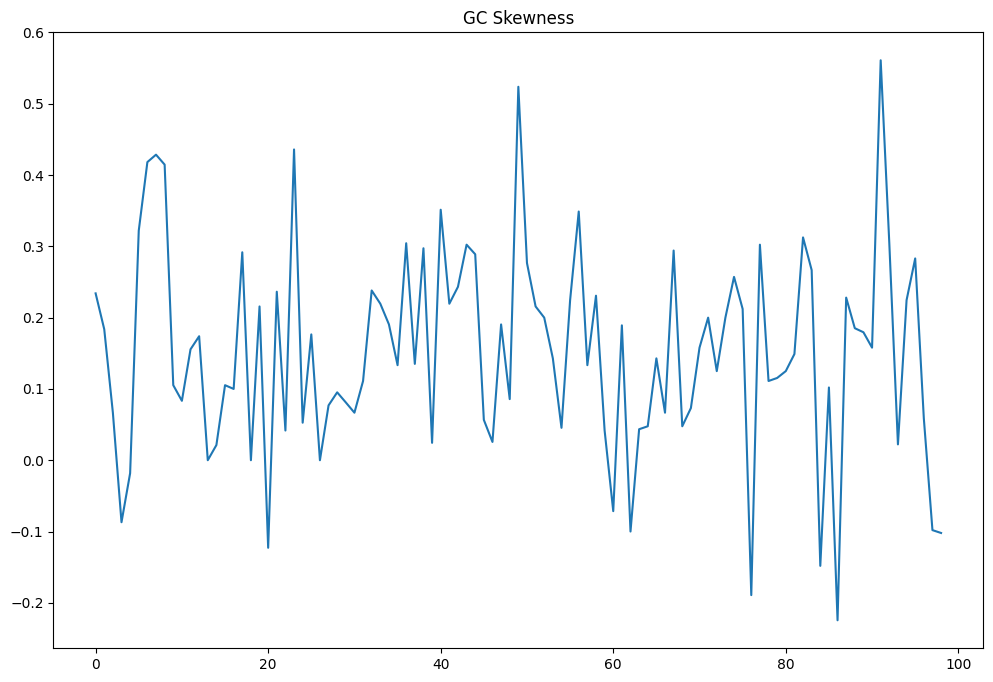

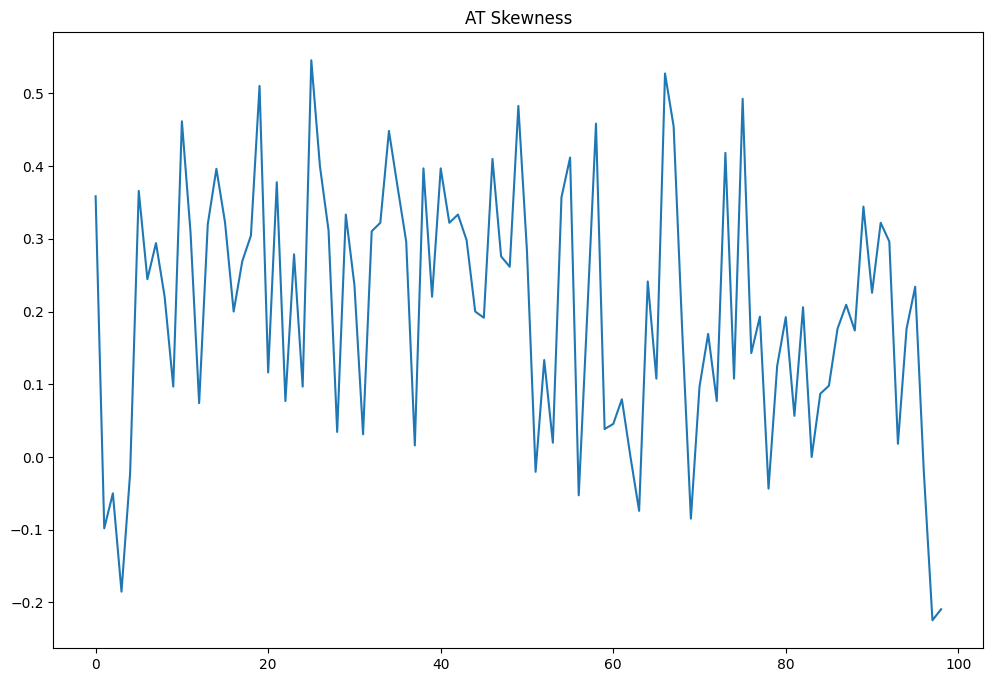

In [ ]:
plt.figure(figsize=(12,8))
plt.title('GC Skewness')
plt.plot(skewness(siv_mac_seq, "G", "C"))
plt.show()

plt.figure(figsize=(12,8))
plt.title('AT Skewness')
plt.plot(skewness(siv_mac_seq, "A", "T"))
plt.show()